# TASK 1b

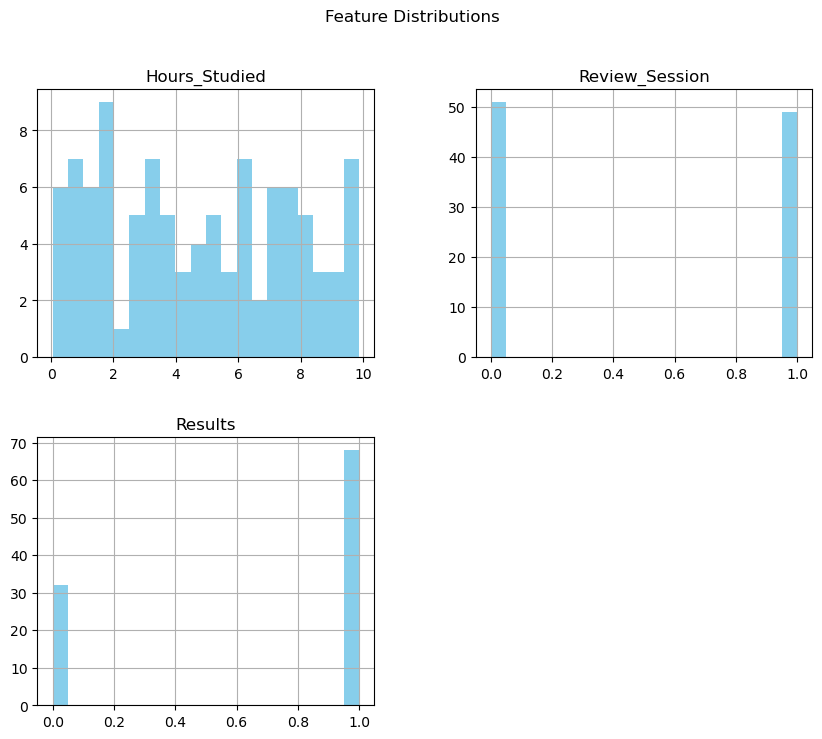

/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


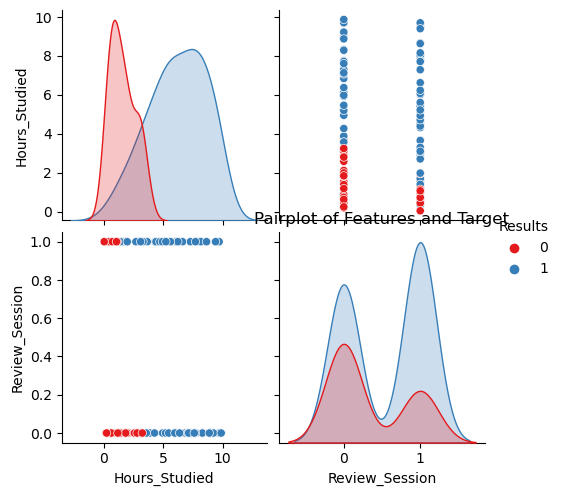

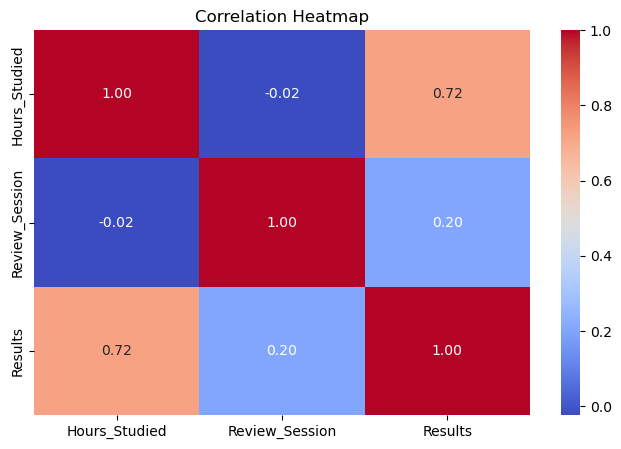

Accuracy: 0.9300
AUC: 0.9761
Model Coefficients:
          Feature  Coefficient
0   Hours_Studied     1.364992
1  Review_Session     1.877338


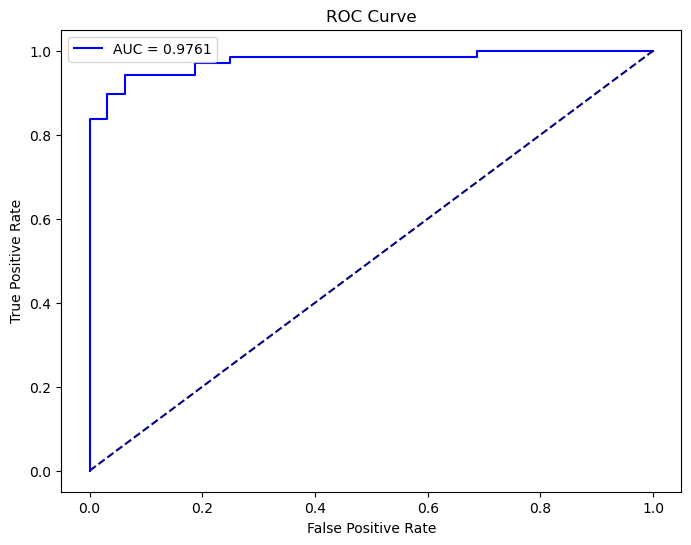

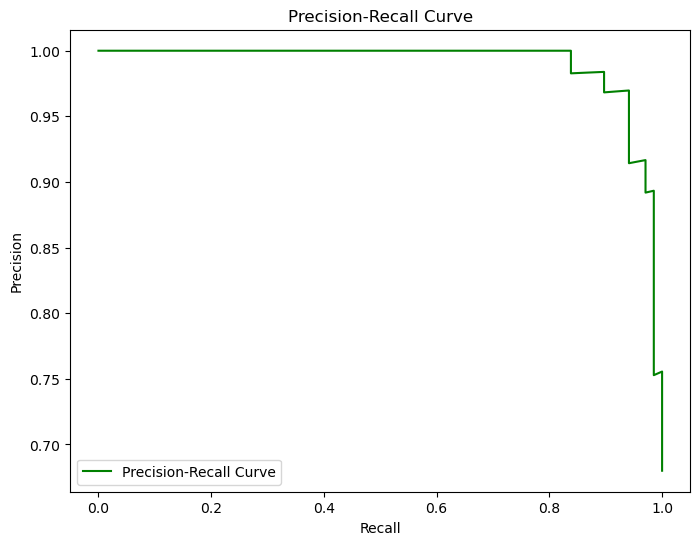

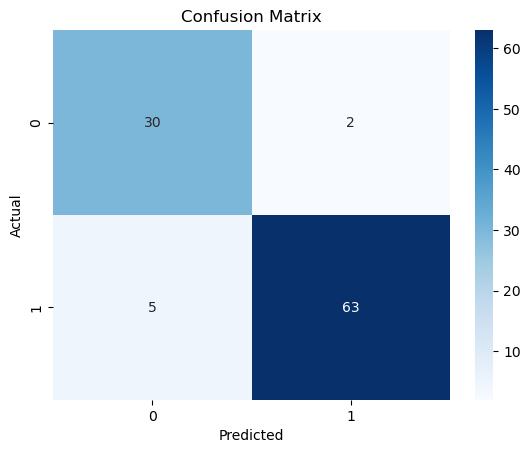

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

# Load your dataset (modify the path as needed)
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/student_data.csv')  # Update the path if needed

# Data visualization with histograms and pairplots
def visualize_data(df, target_column):
    # Feature Distribution (Histograms)
    df.hist(figsize=(10, 8), bins=20, color='skyblue')
    plt.suptitle('Feature Distributions')
    plt.show()

    # Pairplot (Relationships between features and target)
    sns.pairplot(df, hue=target_column, palette='Set1', diag_kind='kde')
    plt.title('Pairplot of Features and Target')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Fit Logistic Regression and Evaluate Model
def fit_logistic_regression(df, target_column):
    # Define X (features) and y (target)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Train the logistic regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings occur
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)
    y_pred_prob = model.predict_proba(X)[:, 1]

    # Model performance metrics
    accuracy = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_prob)

    # Output model coefficients
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_[0]
    })

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred_prob)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y, y_pred_prob)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Model Coefficients:")
    print(coefficients)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Main function to run the analysis
def main():
    # Load the dataset here
    df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/student_data.csv')  # Ensure the correct path to the dataset

    # Define the target variable
    target_column = 'Results'  # The target variable is 'Results'

    # Visualize data
    visualize_data(df, target_column)

    # Fit Logistic Regression and evaluate performance
    fit_logistic_regression(df, target_column)

# Call the main function
if __name__ == "__main__":
    main()

# TASK 2

SVM with Linear Kernel:
Linear Kernel SVM Accuracy: 0.9000
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



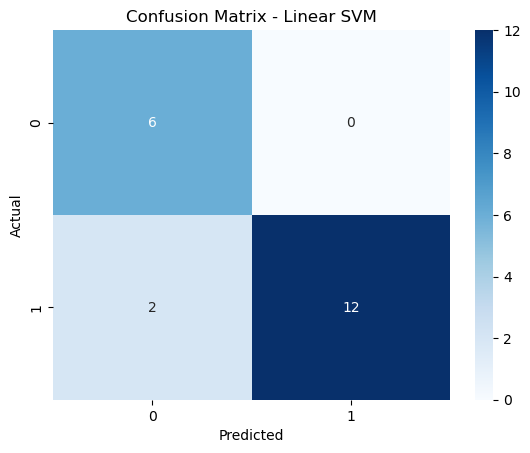


SVM with RBF Kernel and Grid Search for Gamma:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Gamma for RBF Kernel: 1
RBF Kernel SVM Accuracy: 0.9000
Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



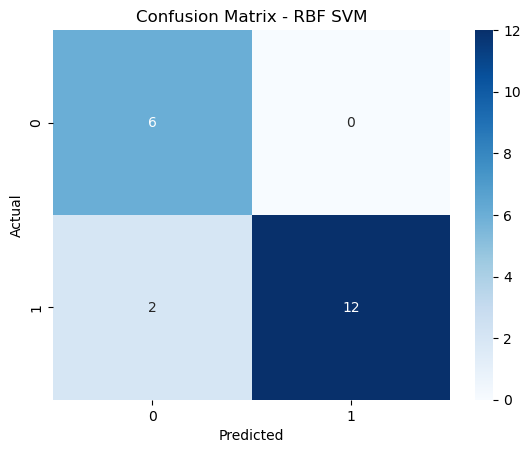


SVM with Polynomial Kernel (5-Fold Cross-Validation):
Polynomial Kernel SVM Average Accuracy (5-Fold CV): 0.9300
Accuracies for each fold: [0.9, 0.95, 0.9, 0.95, 0.95]


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/student_data.csv')  # Update with actual dataset path

# Feature scaling
scaler = StandardScaler()

# Define the feature matrix (X) and target variable (y)
X = df.drop(columns=['Results'])  # Features
X_scaled = scaler.fit_transform(X)  # Scale the features
y = df['Results']  # Target

# Split the data into training and testing sets (using 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. SVM with Linear Kernel
def svm_linear(X_train, X_test, y_train, y_test):
    # Initialize and train the SVM model with linear kernel
    linear_svm = SVC(kernel='linear')
    linear_svm.fit(X_train, y_train)

    # Predictions
    y_pred_linear = linear_svm.predict(X_test)

    # Evaluation
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    print(f"Linear Kernel SVM Accuracy: {accuracy_linear:.4f}")
    print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear))
    
    # Confusion Matrix
    cm_linear = confusion_matrix(y_test, y_pred_linear)
    sns.heatmap(cm_linear, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix - Linear SVM')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 2. SVM with RBF Kernel and Grid Search for Best Gamma
def svm_rbf(X_train, X_test, y_train, y_test):
    # Define the parameter grid for gamma in the RBF kernel
    param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    # Initialize the SVM with RBF kernel
    rbf_svm = SVC(kernel='rbf')

    # Use GridSearchCV to find the best gamma using 5-fold cross-validation
    grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Print the best gamma found by the grid search
    print(f"Best Gamma for RBF Kernel: {grid_search.best_params_['gamma']}")

    # Train the RBF SVM with the best gamma
    best_rbf_svm = grid_search.best_estimator_

    # Predictions
    y_pred_rbf = best_rbf_svm.predict(X_test)

    # Evaluation
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    print(f"RBF Kernel SVM Accuracy: {accuracy_rbf:.4f}")
    print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))
    
    # Confusion Matrix
    cm_rbf = confusion_matrix(y_test, y_pred_rbf)
    sns.heatmap(cm_rbf, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix - RBF SVM')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 3. SVM with Polynomial Kernel and Stratified KFold Cross-Validation
def svm_poly(X, y):
    # Initialize the SVM with polynomial kernel
    poly_svm = SVC(kernel='poly', degree=3)

    # Use StratifiedKFold to maintain the balance of classes in each fold
    skf = StratifiedKFold(n_splits=5)
    
    accuracies = []
    
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        # Train the model
        poly_svm.fit(X_train_fold, y_train_fold)
        
        # Predictions
        y_pred_poly = poly_svm.predict(X_test_fold)
        
        # Accuracy
        accuracy_poly = accuracy_score(y_test_fold, y_pred_poly)
        accuracies.append(accuracy_poly)
    
    # Print cross-validation results
    print(f"Polynomial Kernel SVM Average Accuracy (5-Fold CV): {np.mean(accuracies):.4f}")
    print(f"Accuracies for each fold: {accuracies}")
    
# Main function to run the analysis
def main():
    # SVM with Linear Kernel
    print("SVM with Linear Kernel:")
    svm_linear(X_train, X_test, y_train, y_test)

    # SVM with RBF Kernel and Grid Search for Best Gamma
    print("\nSVM with RBF Kernel and Grid Search for Gamma:")
    svm_rbf(X_train, X_test, y_train, y_test)

    # SVM with Polynomial Kernel and Stratified KFold Cross-Validation
    print("\nSVM with Polynomial Kernel (5-Fold Cross-Validation):")
    svm_poly(X_scaled, y)

# Run the main function
if __name__ == "__main__":
    main()